# Analysis and Comparison of Clustering Algorithms

This project uses supermarket transaction data to **segment customers** based on purchase behavior using **K-Means**, **DBSCAN**, and **OPTICS** clustering.

## About the Dataset

The dataset was obtained from this GitHub repository: https://github.com/itsmecevi/supermatket-transactions-dataset/blob/master/Supermarket%20Transactions.xlsx

It is a dataset with **~14000 rows** of supermarket transactions, with detailed information on customers as well as products. The dataset has been explicitly declared as synthetic, since real world transaction data tends to be sensitive/confidential to supermarkets.

The **16 columns** present in the dataset are:
- **Transaction:** An ID number for each row (transaction).
- **Purchase Date:** The date on which the transaction occurred.
- **Customer ID:** An ID number to represent a customer.
- **Gender:** Either **M (male)** or **F (female)** to represent the gender of the customer.
- **Marital Status:** Either **S (single)** or **M (married)** to represent the marital status of a customer.
- **Homeowner:** Either **Y (yes)** or **N (no)** to represent if the customer is a homeowner.
- **Children:** The number of children of a customer.
- **Annual Income:** A range of the annual salaries of a customer, in USD. **E.g., \$30K - \$50K, \$150K+, etc.**
- **City:** The city of residence of the customer, **e.g., Los Angeles, Tacoma, etc.**
- **State or Province:** The state or province of residence of the customer, **e.g., CA (California), OR (Oregon), Veracruz, etc.**
- **Country:** The country of residence of the customer. Either **USA, Canada, or Mexico.**
- **Product Family:** A broad classification of products into either **Food, Drink, or Non-Consumable.**
- **Product Department:** A slightly lower level of classification of products, **e.g., Snacks, Beverages, Household, Health and Hygiene, etc.**
- **Product Category:** The lowest level of classification of products in this dataset, **e.g., Candy, Vegetables, Canned Tuna, etc.**
- **Units Sold:** The quantity of products of each category sold in the transaction.
- **Revenue:** The revenue generated in the transaction, **e.g., \$27.38, \$8.96, etc.**

## Project Workflow

- Explored dataset and selected relevant features based on simplicity
- Cleaned data: missing values, duplicates, inconsistencies
- Engineered features to capture customer behavior
- Normalized and encoded data for clustering
- Applied clustering algorithms: K-Means, DBSCAN, OPTICS
- Evaluated and visualed cluster results

## Results

- **K-Means** performed the **best** with a **Davies-Bouldin Score of ~0.610** (the lower, the better).
- **DBSCAN** and **OPTICS** had higher scores (**~1.269** and **~1.324** respectively), indicating less compact or well-separated clusters, especially since they both clustered **visually distinct single clusters as multiple ones**, unlike K-Means.
- This suggests that **K-Means was the most effective** for this dataset for customer segmentation.

## Conclusion

  The project shows that **K-Means provided the most meaningful customer segments** for this dataset, which can help in tasks like develop marketing strategies for supermarkets. Possible improvements can include exploring other clustering algorithms, or **integrating into larger retail analytics systems.**

## Code Implementation

### Importing Libraries

In [ ]:
# Universally required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

# Dimensionality reduction for plotting
from sklearn.decomposition import PCA

# Clustering metrics
from sklearn.metrics import davies_bouldin_score  # Compared for all 3 models
from sklearn.metrics import silhouette_score  # For optimal number of clusters in KMeans

# Miscellaneous
from sklearn.neighbors import NearestNeighbors  # For optimal value of eps in DBSCAN

### Data Loading and Exploration

In [ ]:
# Reading the dataset file
datafile = 'Supermarket Transactions.xlsx'
df = pd.read_excel(datafile)

In [ ]:
df.head()

,Transaction,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Children,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
0,1,2011-12-18,7223,F,S,Y,2,$30K - $50K,Los Angeles,CA,USA,Food,Snack Foods,Snack Foods,5,27.38
1,2,2011-12-20,7841,M,M,Y,5,$70K - $90K,Los Angeles,CA,USA,Food,Produce,Vegetables,5,14.90
2,3,2011-12-21,8374,F,M,N,2,$50K - $70K,Bremerton,WA,USA,Food,Snack Foods,Snack Foods,3,5.52
3,4,2011-12-21,9619,M,M,Y,3,$30K - $50K,Portland,OR,USA,Food,Snacks,Candy,4,4.44
4,5,2011-12-22,1900,F,S,Y,3,$130K - $150K,Beverly Hills,CA,USA,Drink,Beverages,Carbonated Beverages,4,14.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14059 entries, 0 to 14058
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction         14059 non-null  int64         
 1   Purchase Date       14059 non-null  datetime64[ns]
 2   Customer ID         14059 non-null  int64         
 3   Gender              14059 non-null  object        
 4   Marital Status      14059 non-null  object        
 5   Homeowner           14059 non-null  object        
 6   Children            14059 non-null  int64         
 7   Annual Income       14059 non-null  object        
 8   City                14059 non-null  object        
 9   State or Province   14059 non-null  object        
 10  Country             14059 non-null  object        
 11  Product Family      14059 non-null  object        
 12  Product Department  14059 non-null  object        
 13  Product Category    14059 non-null  object    

In [ ]:
df.shape

(14059, 16)

### Feature Selection

In [ ]:
df = df[['Customer ID', 'Purchase Date', 'Product Category', 'Units Sold', 'Revenue']]
df.head()

,Customer ID,Purchase Date,Product Category,Units Sold,Revenue
0,7223,2011-12-18,Snack Foods,5,27.38
1,7841,2011-12-20,Vegetables,5,14.90
2,8374,2011-12-21,Snack Foods,3,5.52
3,9619,2011-12-21,Candy,4,4.44
4,1900,2011-12-22,Carbonated Beverages,4,14.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14059 entries, 0 to 14058
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer ID       14059 non-null  int64         
 1   Purchase Date     14059 non-null  datetime64[ns]
 2   Product Category  14059 non-null  object        
 3   Units Sold        14059 non-null  int64         
 4   Revenue           14059 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 549.3+ KB


### Data Cleaning

#### Missing Values

In [ ]:
df.isnull().sum()  # Finding the number of missing values in each column

,0
Customer ID,0
Purchase Date,0
Product Category,0
Units Sold,0
Revenue,0


#### Duplicate Values

In [ ]:
df.duplicated().sum()  # Finding the number of duplicated rows

0

#### Inconsistent/Illogical Data

##### Illogical Data

In [ ]:
df[df['Revenue'] <= 0]  # Checking if 'Revenue' has negative or 0 values

,Customer ID,Purchase Date,Product Category,Units Sold,Revenue


In [ ]:
df[df['Units Sold'] <= 0]  # Checking if 'Units Sold' has negative or 0 values

,Customer ID,Purchase Date,Product Category,Units Sold,Revenue


In [ ]:
df[df['Customer ID'] <= 0]  # Checking if 'Customer ID' has negative or 0 values

,Customer ID,Purchase Date,Product Category,Units Sold,Revenue


##### Inconsistent Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14059 entries, 0 to 14058
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer ID       14059 non-null  int64         
 1   Purchase Date     14059 non-null  datetime64[ns]
 2   Product Category  14059 non-null  object        
 3   Units Sold        14059 non-null  int64         
 4   Revenue           14059 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 549.3+ KB


In [ ]:
df['Product Category'].unique()  # Analysing unique names of 'Product Category'

array(['Snack Foods', 'Vegetables', 'Candy', 'Carbonated Beverages',
       'Side Dishes', 'Breakfast Foods', 'Canned Soup',
       'Cleaning Supplies', 'Pain Relievers', 'Baking Goods',
       'Canned Tuna', 'Plastic Products', 'Fruit', 'Hygiene', 'Meat',
       'Dairy', 'Drinks', 'Magazines', 'Beer and Wine', 'Hardware',
       'Paper Products', 'Seafood', 'Electrical', 'Bathroom Products',
       'Kitchen Products', 'Bread', 'Specialty', 'Canned Sardines',
       'Miscellaneous', 'Pizza', 'Decongestants', 'Starchy Foods',
       'Jams and Jellies', 'Frozen Desserts', 'Eggs',
       'Pure Juice Beverages', 'Hot Beverages', 'Canned Oysters',
       'Packaged Vegetables', 'Frozen Entrees', 'Canned Anchovies',
       'Candles', 'Cold Remedies', 'Canned Shrimp', 'Canned Clams'],
      dtype=object)

In [ ]:
# Defining a mapping dictionary to refine names of 'Product Category'
category_mappings = {
    # Food
    'Snack Foods': 'Food',
    'Candy': 'Food',
    'Side Dishes': 'Food',
    'Breakfast Foods': 'Food',
    'Canned Soup': 'Food',
    'Baking Goods': 'Food',
    'Meat': 'Food',
    'Dairy': 'Food',
    'Bread': 'Food',
    'Specialty': 'Food',
    'Pizza': 'Food',
    'Starchy Foods': 'Food',
    'Eggs': 'Food',
    'Frozen Entrees': 'Food',

    # Beverages
    'Carbonated Beverages': 'Beverages',
    'Drinks': 'Beverages',
    'Beer and Wine': 'Beverages',
    'Pure Juice Beverages': 'Beverages',
    'Hot Beverages': 'Beverages',

    # Produce
    'Fruit': 'Produce',
    'Vegetables': 'Produce',
    'Packaged Vegetables': 'Produce',

    # Desserts
    'Jams and Jellies': 'Desserts',
    'Frozen Desserts': 'Desserts',

    # Seafood
    'Canned Tuna': 'Seafood',
    'Seafood': 'Seafood',
    'Canned Sardines': 'Seafood',
    'Canned Oysters': 'Seafood',
    'Canned Anchovies': 'Seafood',
    'Canned Shrimp': 'Seafood',
    'Canned Clams': 'Seafood',

    # Household Supplies
    'Cleaning Supplies': 'Household Supplies',
    'Plastic Products': 'Household Supplies',
    'Hygiene': 'Household Supplies',
    'Magazines': 'Household Supplies',
    'Paper Products': 'Household Supplies',
    'Bathroom Products': 'Household Supplies',
    'Kitchen Products': 'Household Supplies',
    'Miscellaneous': 'Household Supplies',
    'Candles': 'Household Supplies',

    # Medication
    'Pain Relievers': 'Medication',
    'Decongestants': 'Medication',
    'Cold Remedies': 'Medication',

    # Electrical Goods
    'Hardware': 'Electrical Goods',
    'Electrical': 'Electrical Goods'
}

In [ ]:
# Checking to see if all unique values of
# 'Product Category' have been covered
# in the mapping dictionary
df['Product Category'].nunique() == len(category_mappings)

True

In [ ]:
# Mapping the names in 'Product Category'
df['Product Category'] = df['Product Category'].map(category_mappings)
df['Product Category'].unique()

array(['Food', 'Produce', 'Beverages', 'Household Supplies', 'Medication',
       'Seafood', 'Electrical Goods', 'Desserts'], dtype=object)

## Data Preprocessing

In [ ]:
df.head()

,Customer ID,Purchase Date,Product Category,Units Sold,Revenue
0,7223,2011-12-18,Food,5,27.38
1,7841,2011-12-20,Produce,5,14.90
2,8374,2011-12-21,Food,3,5.52
3,9619,2011-12-21,Food,4,4.44
4,1900,2011-12-22,Beverages,4,14.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14059 entries, 0 to 14058
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer ID       14059 non-null  int64         
 1   Purchase Date     14059 non-null  datetime64[ns]
 2   Product Category  14059 non-null  object        
 3   Units Sold        14059 non-null  int64         
 4   Revenue           14059 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 549.3+ KB


### Feature Engineering

In [ ]:
# Creating a 'Price' column to represent average price of each 'Product Category'
df['Price'] = df['Revenue'] / df['Units Sold']

# Rearranging the column order in the dataframe
df = df[['Customer ID', 'Purchase Date', 'Product Category', 'Price', 'Units Sold', 'Revenue']]
df.head()

,Customer ID,Purchase Date,Product Category,Price,Units Sold,Revenue
0,7223,2011-12-18,Food,5.476,5,27.38
1,7841,2011-12-20,Produce,2.980,5,14.90
2,8374,2011-12-21,Food,1.840,3,5.52
3,9619,2011-12-21,Food,1.110,4,4.44
4,1900,2011-12-22,Beverages,3.500,4,14.00


In [ ]:
# Grouping the data by 'Customer ID' so that
# each category represents a single customer
clustering_df = df.groupby('Customer ID').agg({
    'Purchase Date': 'count',  # Frequency of purchases
    'Product Category': lambda x: x.mode()[0],  # Most common product category
    'Price': 'mean',  # Average price that the customer usually buys products of
    'Units Sold': ['sum', 'mean'],  # Total and average units sold per visit
    'Revenue': ['sum', 'mean']  # Total and average amount spent per visit
}).reset_index()

clustering_df.head()

Customer ID Purchase Date    Product Category     Price Units Sold  \
                      count            <lambda>      mean        sum   
0           3             1  Household Supplies  4.883333          6   
1           8             4             Produce  4.624375         14   
2           9             2           Beverages  6.221500          9   
3          20             3                Food  4.817556         13   
4          24             2                Food  1.552500          6   

            Revenue             
       mean     sum       mean  
0  6.000000   29.30  29.300000  
1  3.500000   64.72  16.180000  
2  4.500000   51.66  25.830000  
3  4.333333   59.27  19.756667  
4  3.000000    8.70   4.350000

In [ ]:
# Renaming the columns for clarity
clustering_df.columns = [
    'Customer ID',
    'Frequency of Visits',
    'Most Common Product Category',
    'Avg Price',
    'Total Units Sold',
    'Avg Units Sold Per Visit',
    'Total Revenue Generated',
    'Avg Revenue Per Visit'
]

clustering_df.head()

,Customer ID,Frequency of Visits,Most Common Product Category,Avg Price,Total Units Sold,Avg Units Sold Per Visit,Total Revenue Generated,Avg Revenue Per Visit
0,3,1,Household Supplies,4.883333,6,6.000000,29.30,29.300000
1,8,4,Produce,4.624375,14,3.500000,64.72,16.180000
2,9,2,Beverages,6.221500,9,4.500000,51.66,25.830000
3,20,3,Food,4.817556,13,4.333333,59.27,19.756667
4,24,2,Food,1.552500,6,3.000000,8.70,4.350000


In [ ]:
clustering_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   5404 non-null   int64  
 1   Frequency of Visits           5404 non-null   int64  
 2   Most Common Product Category  5404 non-null   object 
 3   Avg Price                     5404 non-null   float64
 4   Total Units Sold              5404 non-null   int64  
 5   Avg Units Sold Per Visit      5404 non-null   float64
 6   Total Revenue Generated       5404 non-null   float64
 7   Avg Revenue Per Visit         5404 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 337.9+ KB


### Normalization

In [ ]:
# Creating an instance of MinMaxScaler to
# normalize all values into ranging from 0 to 1
scaler = MinMaxScaler()

In [ ]:
# All numeric columns
numeric_cols = clustering_df.drop(columns=['Customer ID', 'Most Common Product Category'])

# Normalizing all numeric columns
clustering_df[numeric_cols.columns] = scaler.fit_transform(clustering_df[numeric_cols.columns])
clustering_df.head()

,Customer ID,Frequency of Visits,Most Common Product Category,Avg Price,Total Units Sold,Avg Units Sold Per Visit,Total Revenue Generated,Avg Revenue Per Visit
0,3,0.000000,Household Supplies,0.412992,0.059524,0.833333,0.088181,0.613825
1,8,0.157895,Produce,0.390157,0.154762,0.416667,0.196745,0.333902
2,9,0.052632,Beverages,0.530996,0.095238,0.583333,0.156716,0.539791
3,20,0.105263,Food,0.407192,0.142857,0.555556,0.180040,0.410213
4,24,0.052632,Food,0.119268,0.059524,0.333333,0.025041,0.081502


In [ ]:
clustering_df[numeric_cols.columns].describe()

,Frequency of Visits,Avg Price,Total Units Sold,Avg Units Sold Per Visit,Total Revenue Generated,Avg Revenue Per Visit
count,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000
mean,0.084294,0.272274,0.114476,0.503283,0.102073,0.261520
std,0.121508,0.141831,0.117832,0.165983,0.103333,0.141027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.175473,0.035714,0.416667,0.033317,0.165351
50%,0.052632,0.255861,0.071429,0.500000,0.069561,0.243098
75%,0.105263,0.343487,0.142857,0.611111,0.134118,0.330293
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Encoding

In [ ]:
clustering_df.head()

,Customer ID,Frequency of Visits,Most Common Product Category,Avg Price,Total Units Sold,Avg Units Sold Per Visit,Total Revenue Generated,Avg Revenue Per Visit
0,3,0.000000,Household Supplies,0.412992,0.059524,0.833333,0.088181,0.613825
1,8,0.157895,Produce,0.390157,0.154762,0.416667,0.196745,0.333902
2,9,0.052632,Beverages,0.530996,0.095238,0.583333,0.156716,0.539791
3,20,0.105263,Food,0.407192,0.142857,0.555556,0.180040,0.410213
4,24,0.052632,Food,0.119268,0.059524,0.333333,0.025041,0.081502


In [ ]:
# Creating an instance of One-Hot Encoder to
# encode 'Most Common Product Category'
encoder = OneHotEncoder(sparse_output=False)

In [ ]:
# Encoding 'Most Common Product Category'
encoded = encoder.fit_transform(clustering_df[['Most Common Product Category']])
encoded_df = pd.DataFrame(encoded, columns = encoder.categories_[0])
encoded_df.head()

,Beverages,Desserts,Electrical Goods,Food,Household Supplies,Medication,Produce,Seafood
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Adding the encoded columns to the dataset while
# dropping the original 'Most Common Product Category' column
clustering_df = clustering_df.drop(columns=['Most Common Product Category']).join(encoded_df)
clustering_df.head()

,Customer ID,Frequency of Visits,Avg Price,Total Units Sold,Avg Units Sold Per Visit,Total Revenue Generated,Avg Revenue Per Visit,Beverages,Desserts,Electrical Goods,Food,Household Supplies,Medication,Produce,Seafood
0,3,0.000000,0.412992,0.059524,0.833333,0.088181,0.613825,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,8,0.157895,0.390157,0.154762,0.416667,0.196745,0.333902,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9,0.052632,0.530996,0.095238,0.583333,0.156716,0.539791,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,0.105263,0.407192,0.142857,0.555556,0.180040,0.410213,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24,0.052632,0.119268,0.059524,0.333333,0.025041,0.081502,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Plotting the Data Before Clustering

In [ ]:
# Dropping 'Customer ID' before plotting
clustering_X = clustering_df.drop(columns=['Customer ID'])

In [ ]:
# Reducing the dataset into 2 dimensions
pca = PCA(n_components=2)
clustering_X_pca = pca.fit_transform(clustering_X)

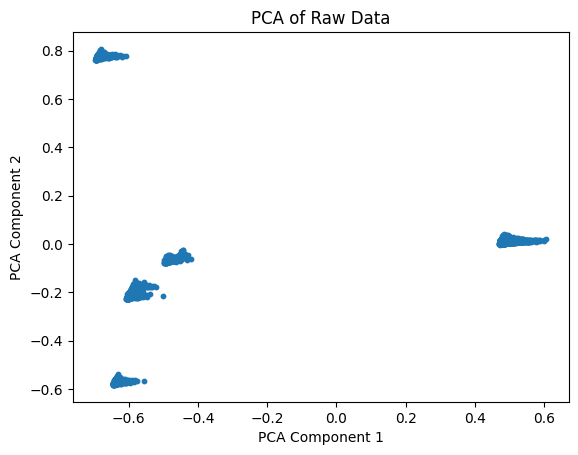

In [ ]:
# Scatter plot of the data before clustering
plt.scatter(clustering_X_pca[:, 0], clustering_X_pca[:, 1], s=10)

plt.title("PCA of Raw Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.show()

## Clustering with K-Means

### Finding Optimal Number of Clusters

In [ ]:
# Making a copy of the dataset for KMeans
kmeans_df = clustering_df.copy()
kmeans_df.head()

,Customer ID,Frequency of Visits,Avg Price,Total Units Sold,Avg Units Sold Per Visit,Total Revenue Generated,Avg Revenue Per Visit,Beverages,Desserts,Electrical Goods,Food,Household Supplies,Medication,Produce,Seafood
0,3,0.000000,0.412992,0.059524,0.833333,0.088181,0.613825,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,8,0.157895,0.390157,0.154762,0.416667,0.196745,0.333902,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9,0.052632,0.530996,0.095238,0.583333,0.156716,0.539791,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,0.105263,0.407192,0.142857,0.555556,0.180040,0.410213,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24,0.052632,0.119268,0.059524,0.333333,0.025041,0.081502,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Using the Silhouette Score method to find
# the optimal number of clusters
cluster_range = range(2, 11)
silhouette_scores = []

# Dropping 'Customer ID' (and 'Cluster' if rerunning this cell) before clustering
for col in kmeans_df.columns:
  if col in ['Customer ID', 'Cluster']:
    kmeans_X = kmeans_df.drop(columns=col)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(kmeans_X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(kmeans_X, labels)
    silhouette_scores.append(silhouette_avg)

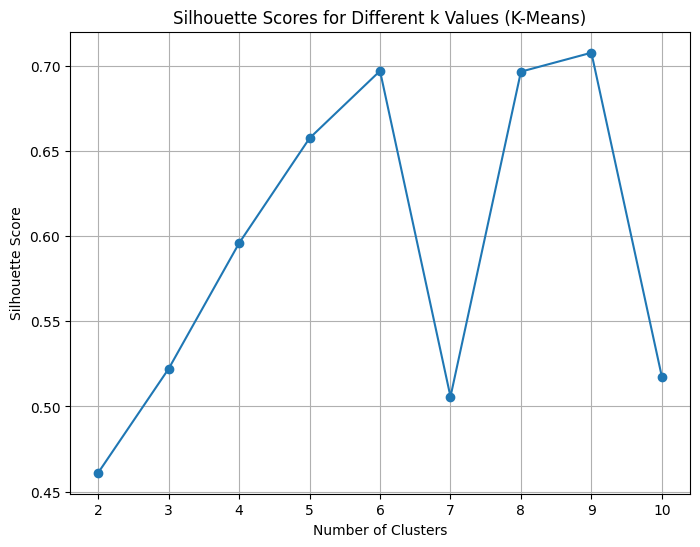

In [ ]:
# Scatter plot of the data before clustering
plt.figure(figsize=(8, 6))

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k Values (K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.grid(True)
plt.show()

### Clustering the Data

In [ ]:
optimal_k = 9  # As seen in the Silhouette Score plot

# Clustering the data and storing the cluster labels
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_df['Cluster'] = kmeans.fit_predict(kmeans_X)

In [ ]:
kmeans_df.head()

,Customer ID,Frequency of Visits,Avg Price,Total Units Sold,Avg Units Sold Per Visit,Total Revenue Generated,Avg Revenue Per Visit,Beverages,Desserts,Electrical Goods,Food,Household Supplies,Medication,Produce,Seafood,Cluster
0,3,0.000000,0.412992,0.059524,0.833333,0.088181,0.613825,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,8,0.157895,0.390157,0.154762,0.416667,0.196745,0.333902,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,9,0.052632,0.530996,0.095238,0.583333,0.156716,0.539791,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,20,0.105263,0.407192,0.142857,0.555556,0.180040,0.410213,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,24,0.052632,0.119268,0.059524,0.333333,0.025041,0.081502,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


### Plotting the Clusters

In [ ]:
# Reducing the dataset into 2 dimensions
pca = PCA(n_components=2)
kmeans_X_pca = pca.fit_transform(kmeans_X)

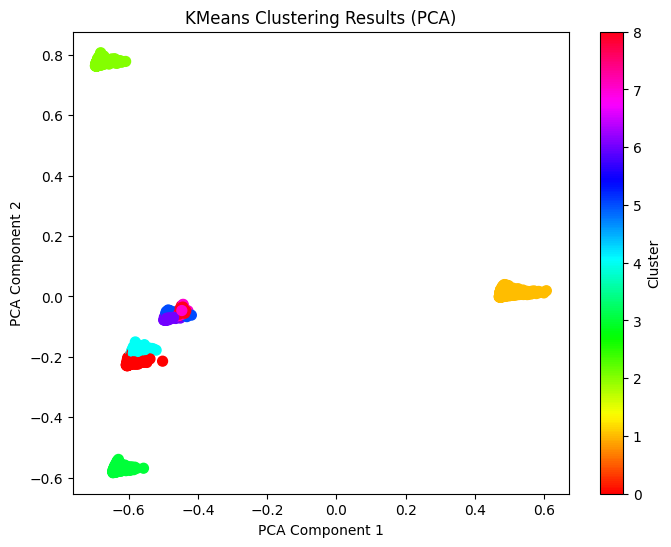

In [ ]:
# Scatter plot of the data after KMeans clustering,
# colors separated by cluster
plt.figure(figsize=(8, 6))
plt.scatter(kmeans_X_pca[:, 0], kmeans_X_pca[:, 1], c=kmeans_df['Cluster'], cmap='hsv', s=50)

plt.title("KMeans Clustering Results (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')

plt.show()

### Evaluation

In [ ]:
# Calculating the Davies-Bouldin Index
dbi_score_kmeans = davies_bouldin_score(kmeans_X, kmeans.labels_)
print(f"Davies-Bouldin Index (DBI) for KMeans: {dbi_score_kmeans}")

Davies-Bouldin Index (DBI) for KMeans: 0.6107389576661488


## Clustering with DBSCAN

In [ ]:
# Making a copy of the dataset for DBSCAN
dbscan_df = clustering_df.copy()
dbscan_df.head()

,Customer ID,Frequency of Visits,Avg Price,Total Units Sold,Avg Units Sold Per Visit,Total Revenue Generated,Avg Revenue Per Visit,Beverages,Desserts,Electrical Goods,Food,Household Supplies,Medication,Produce,Seafood
0,3,0.000000,0.412992,0.059524,0.833333,0.088181,0.613825,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,8,0.157895,0.390157,0.154762,0.416667,0.196745,0.333902,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9,0.052632,0.530996,0.095238,0.583333,0.156716,0.539791,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,0.105263,0.407192,0.142857,0.555556,0.180040,0.410213,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24,0.052632,0.119268,0.059524,0.333333,0.025041,0.081502,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Dropping 'Customer ID' (and 'Cluster' if rerunning this cell) before clustering
for col in dbscan_df.columns:
  if col in ['Customer ID', 'Cluster']:
    dbscan_X = dbscan_df.drop(columns=col)
dbscan_X.columns

Index(['Frequency of Visits', 'Avg Price', 'Total Units Sold',
       'Avg Units Sold Per Visit', 'Total Revenue Generated',
       'Avg Revenue Per Visit', 'Beverages', 'Desserts', 'Electrical Goods',
       'Food', 'Household Supplies', 'Medication', 'Produce', 'Seafood'],
      dtype='object')

### Finding the optimal values for eps and minPtS

#### For minPts

In [ ]:
numof_features = len(dbscan_X.columns)
numof_features

14

In [ ]:
minPts = numof_features * 2  # As a general rule of thumb
minPts

28

#### For eps

In [ ]:
# Finding the distances between each point in the dataset and
# each of its 'minPts' nearest neighbord
neighbors = NearestNeighbors(n_neighbors=minPts)
neighbors_fit = neighbors.fit(dbscan_X)
distances, indices = neighbors_fit.kneighbors(dbscan_X)

In [ ]:
distances = np.sort(distances, axis=0)  # Sorting the distances in ascending order
distances = distances[:,1]  # Distances between each point and only its closest neighbor

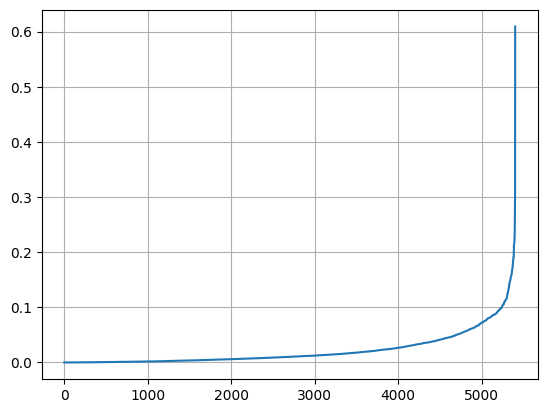

In [ ]:
# Plotting the k-distance elbow plot
plt.figure()
plt.plot(distances)

plt.grid(True)
plt.show()

In [ ]:
optimal_eps = 0.1  # As seen in the k-distance elbow plot
optimal_eps

0.1

### Clustering the Data

In [ ]:
# Clustering the data and storing the cluster labels
dbscan = DBSCAN(eps=optimal_eps, min_samples=minPts)
dbscan_df['Cluster'] = dbscan.fit_predict(dbscan_X)

In [ ]:
dbscan_df.head()

,Customer ID,Frequency of Visits,Avg Price,Total Units Sold,Avg Units Sold Per Visit,Total Revenue Generated,Avg Revenue Per Visit,Beverages,Desserts,Electrical Goods,Food,Household Supplies,Medication,Produce,Seafood,Cluster
0,3,0.000000,0.412992,0.059524,0.833333,0.088181,0.613825,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1
1,8,0.157895,0.390157,0.154762,0.416667,0.196745,0.333902,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1
2,9,0.052632,0.530996,0.095238,0.583333,0.156716,0.539791,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3,20,0.105263,0.407192,0.142857,0.555556,0.180040,0.410213,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,24,0.052632,0.119268,0.059524,0.333333,0.025041,0.081502,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [ ]:
dbscan_df['Cluster'].unique()  # Note that the cluster '-1' is for noise

array([-1,  0,  4,  1,  7,  8,  2,  9,  3, 10, 11,  5,  6])

### Plotting the Clusters

In [ ]:
# Reducing the dataset into 2 dimensions
pca = PCA(n_components=2)
dbscan_X_pca = pca.fit_transform(dbscan_X)

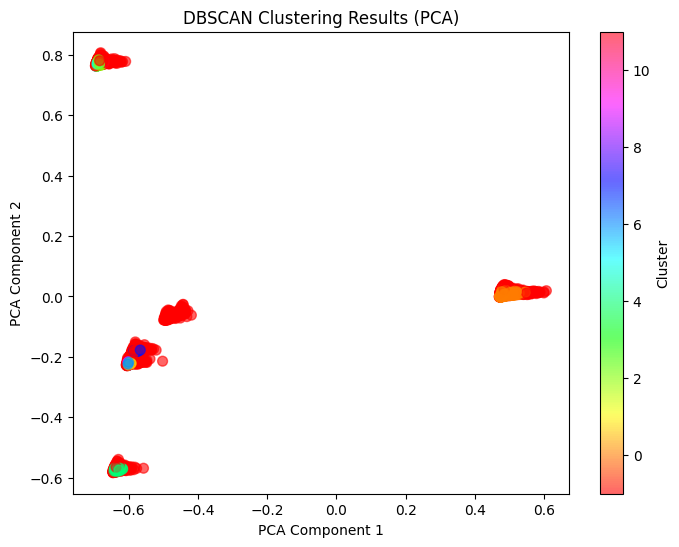

In [ ]:
# Scatter plot of the data after DBSCAN clustering,
# colors separated by cluster
plt.figure(figsize=(8, 6))
plt.scatter(dbscan_X_pca[:, 0], dbscan_X_pca[:, 1], c=dbscan_df['Cluster'], cmap='hsv', s=50, alpha=0.6)

plt.title("DBSCAN Clustering Results (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')

plt.show()

### Evaluation

In [ ]:
# Calculating the Davies-Bouldin Index
dbi_score_dbscan = davies_bouldin_score(dbscan_X, dbscan.labels_)
print(f"Davies-Bouldin Index (DBI) for DBSCAN: {dbi_score_dbscan}")

Davies-Bouldin Index (DBI) for DBSCAN: 1.2695372992688685


## Clustering with OPTICS

In [ ]:
# Making a copy of the dataset for DBSCAN
optics_df = clustering_df.copy()
optics_df.head()

,Customer ID,Frequency of Visits,Avg Price,Total Units Sold,Avg Units Sold Per Visit,Total Revenue Generated,Avg Revenue Per Visit,Beverages,Desserts,Electrical Goods,Food,Household Supplies,Medication,Produce,Seafood
0,3,0.000000,0.412992,0.059524,0.833333,0.088181,0.613825,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,8,0.157895,0.390157,0.154762,0.416667,0.196745,0.333902,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9,0.052632,0.530996,0.095238,0.583333,0.156716,0.539791,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,0.105263,0.407192,0.142857,0.555556,0.180040,0.410213,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24,0.052632,0.119268,0.059524,0.333333,0.025041,0.081502,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Dropping 'Customer ID' (and 'Cluster' if rerunning this cell) before clustering
for col in optics_df.columns:
  if col in ['Customer ID', 'Cluster']:
    optics_X = optics_df.drop(columns=col)
optics_X.columns

Index(['Frequency of Visits', 'Avg Price', 'Total Units Sold',
       'Avg Units Sold Per Visit', 'Total Revenue Generated',
       'Avg Revenue Per Visit', 'Beverages', 'Desserts', 'Electrical Goods',
       'Food', 'Household Supplies', 'Medication', 'Produce', 'Seafood'],
      dtype='object')

### Finding the optimal value for minPts

In [ ]:
optics_numof_features = len(optics_X.columns)
optics_numof_features

14

In [ ]:
optics_minPts = optics_numof_features * 2  # As a general rule of thumb
optics_minPts

28

### Clustering the Data

In [ ]:
# Clustering the data and storing the cluster labels
optics = OPTICS(min_samples=optics_minPts)
optics_df['Cluster'] = optics.fit_predict(optics_X)

### Plotting the Clusters

In [ ]:
# Reducing the dataset into 2 dimensions
pca = PCA(n_components=2)
optics_X_pca = pca.fit_transform(optics_X)

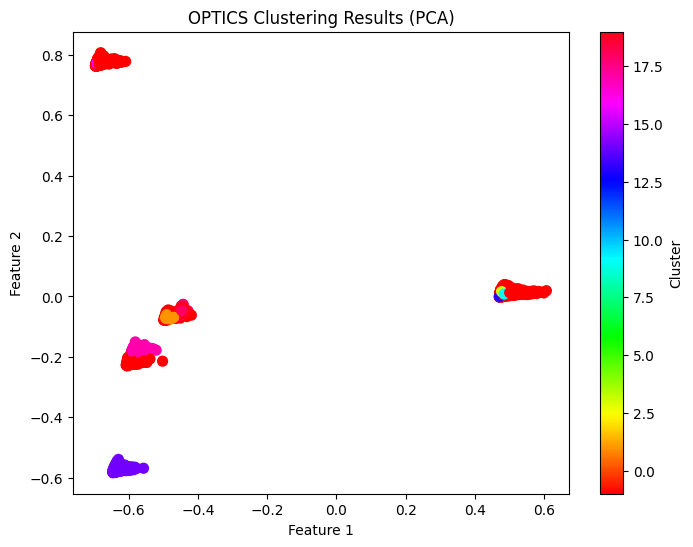

In [ ]:
# Scatter plot of the data after DBSCAN clustering,
# colors separated by cluster
plt.figure(figsize=(8, 6))
plt.scatter(optics_X_pca[:, 0], optics_X_pca[:, 1], c=optics_df['Cluster'], cmap='hsv', s=50)

plt.title("OPTICS Clustering Results (PCA)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster')

plt.show()

### Evaluation

In [ ]:
# Calculating the Davies-Bouldin Index
dbi_score_optics = davies_bouldin_score(optics_X, optics_df['Cluster'])
print(f"Davies-Bouldin Index (DBI) for OPTICS: {dbi_score_optics}")

Davies-Bouldin Index (DBI) for OPTICS: 1.3239479105011218
